   calls_per_duty  sick_rate
0        4.796471   0.042941
1        5.015294   0.037647
2        4.757647   0.040000
3        4.143529   0.041765
4        4.256471   0.037059 



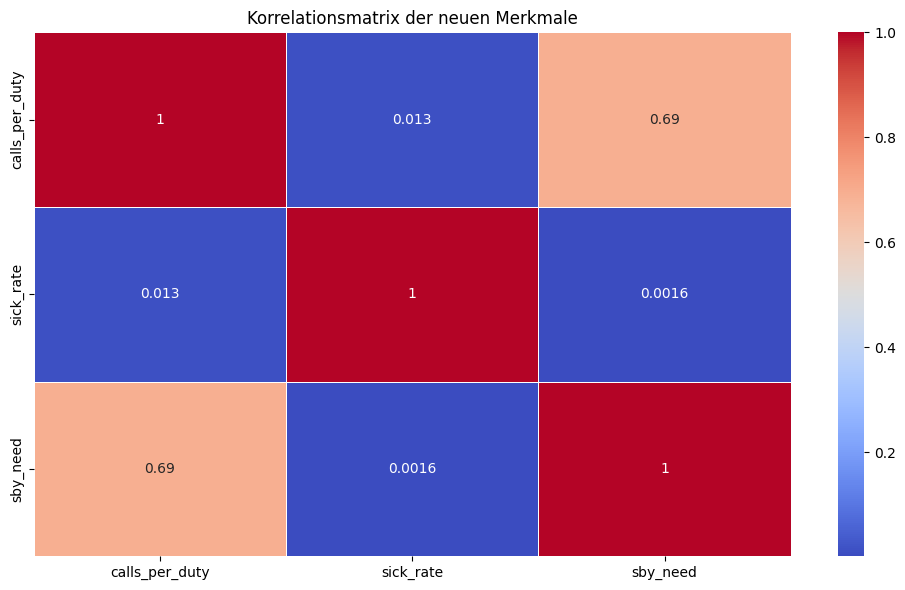

|                |   calls_per_duty |   sick_rate |   sby_need |
|:---------------|-----------------:|------------:|-----------:|
| calls_per_duty |        1         |   0.0126078 |  0.692822  |
| sick_rate      |        0.0126078 |   1         |  0.0016299 |
| sby_need       |        0.692822  |   0.0016299 |  1         |
   n_sick   calls  n_duty  n_sby  sby_need  dafted  year  month  day_of_week  \
0      73  8154.0    1700     90       4.0     0.0  2016      4            4   
1      64  8526.0    1700     90      70.0     0.0  2016      4            5   
2      68  8088.0    1700     90       0.0     0.0  2016      4            6   
3      71  7044.0    1700     90       0.0     0.0  2016      4            0   
4      63  7236.0    1700     90       0.0     0.0  2016      4            1   

   season_Autumn  season_Spring  season_Summer  season_Winter  calls_per_duty  \
0          False           True          False          False        4.796471   
1          False           True 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Daten einlesen
#data = pd.read_csv('data\raw_data\sickness_table.csv')
data = pd.read_csv(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\project_folder\data\raw_data\sickness_table.csv")

# Datum in Komponenten zerlegen
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# Kategorisierung der Jahreszeiten
data['season'] = data['month'].apply(lambda month: 
                                     'Spring' if 3 <= month <= 5 
                                     else 'Summer' if 6 <= month <= 8 
                                     else 'Autumn' if 9 <= month <= 11 
                                     else 'Winter')

# One-Hot-Encoding für die Jahreszeiten
data = pd.get_dummies(data, columns=['season'], drop_first=False)

# Entfernen der unnötigen Spalten
data = data.drop(columns=['Unnamed: 0', 'date'])

# Berechnung der neuen Merkmale
data['calls_per_duty'] = data['calls'] / data['n_duty']
data['sick_rate'] = data['n_sick'] / data['n_duty']

# Überprüfen Sie die neuen Merkmale
print(data[['calls_per_duty', 'sick_rate']].head(), '\n')

# Berechnen der Korrelationsmatrix 
correlation_matrix = data[['calls_per_duty', 'sick_rate', 'sby_need']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix der neuen Merkmale')
plt.tight_layout()
plt.show()

# Tabelle als Markdown in Jupyter Notebook darstellen
print(correlation_matrix.to_markdown())

# Speichern der vorverarbeiteten Daten
data.to_csv(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\project_folder\data\processed_data\preprocessed_data.csv", index=False)

# Überprüfung der verarbeiteten Daten
print(data.head())
